# Import e Algumas funções

In [3]:
import pandas as pd
data = pd.read_csv('happyscore_income.csv')
data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia
...,...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia


In [4]:
happy = data['happyScore']
income = data['avg_income']
income.max()

26182.275

In [5]:
import matplotlib.pyplot as plt

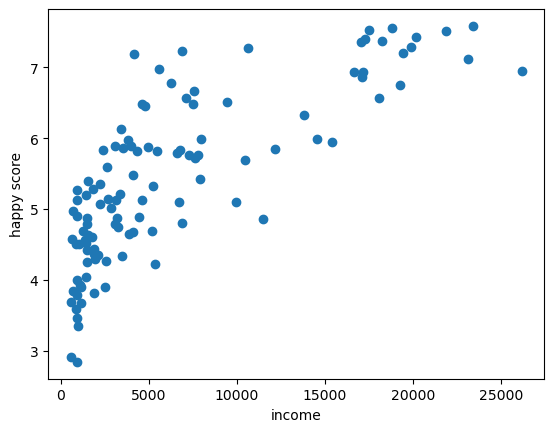

In [6]:
plt.xlabel('income')
plt.ylabel('happy score')
plt.scatter(income, happy)

# Classificação e Filtros

In [7]:
data.sort_values('avg_income', inplace = True)

richest = data[data['avg_income'] > 15000]

In [8]:
richest.iloc[0]

country                             Italy
adjusted_satisfaction                57.0
avg_satisfaction                      6.6
std_satisfaction                     1.81
avg_income                      15437.595
median_income                    13163.07
income_inequality                34.12625
region                   'Western Europe'
happyScore                          5.948
GDP                               1.25114
country.1                           Italy
Name: 49, dtype: object

In [9]:
richest.iloc[0:5]

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
49,Italy,57.0,6.6,1.81,15437.595,13163.070,34.12625,'Western Europe',5.948,1.25114,Italy
44,Ireland,64.0,7.5,1.85,16657.770,13823.160,32.41875,'Western Europe',6.940,1.33596,Ireland
90,Sweden,67.0,7.8,1.72,17032.755,15166.605,26.95000,'Western Europe',7.364,1.33171,Sweden
36,United Kingdom,60.0,7.1,1.98,17099.550,14172.735,34.43250,'Western Europe',6.867,1.26637,United Kingdom
7,Belgium,63.0,7.2,1.72,17168.505,15166.455,28.74500,'Western Europe',6.937,1.30782,Belgium


# Labelling Points on a Graph

Text(26182.275, 6.946000000000001, 'Luxembourg')

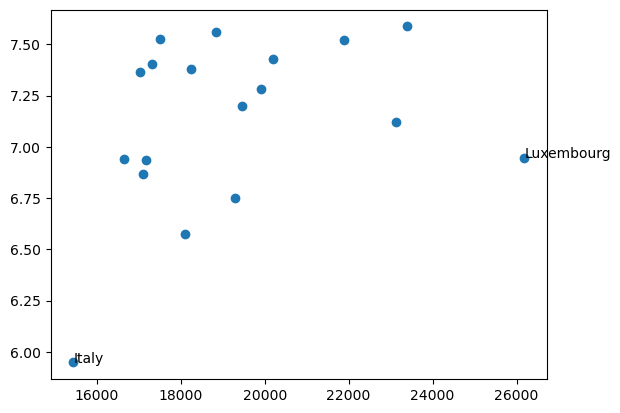

In [10]:
plt.scatter(richest['avg_income'], richest['happyScore'])

plt.text(richest.iloc[0]['avg_income'],
         richest.iloc[0]['happyScore'],
         richest.iloc[0]['country'])
plt.text(richest.iloc[-1]['avg_income'],
         richest.iloc[-1]['happyScore'],
         richest.iloc[-1]['country'])

# Labelling all the Points on a Graph

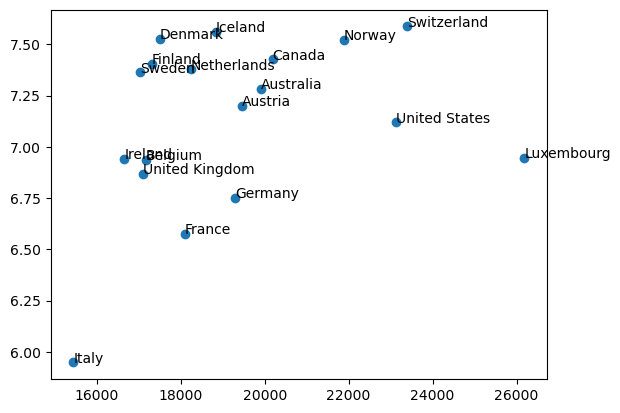

In [11]:
plt.scatter(richest['avg_income'], richest['happyScore'])
for k, row in richest.iterrows():
    plt.text(row['avg_income'],
             row['happyScore'],
             row['country'])

# Eyeballing the Data

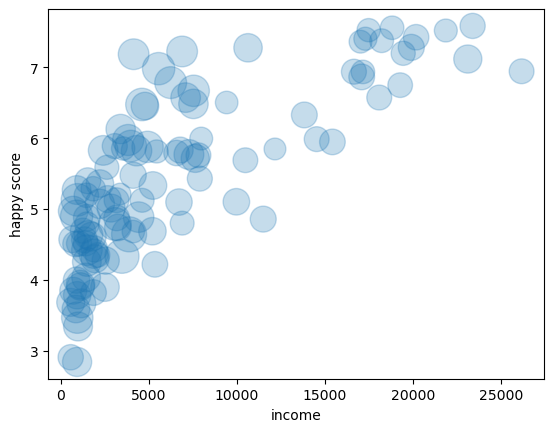

In [12]:
happy = data['happyScore']
income = data['avg_income']
ineq = data['income_inequality']


plt.xlabel('income')
plt.ylabel('happy score')
plt.scatter(income, happy, s = ineq*10, alpha = 0.254)

# Using K-Means to Interpret the Data

In [13]:
from sklearn.cluster import KMeans
import numpy as np
income_happy = np.column_stack((income, happy))

In [14]:
km_res = KMeans(n_clusters=3).fit(income_happy)

In [15]:
km_res.cluster_centers_

array([[2.19912121e+03, 4.75472308e+00],
       [1.87593022e+04, 7.03270000e+00],
       [7.57755711e+03, 5.85080769e+00]])

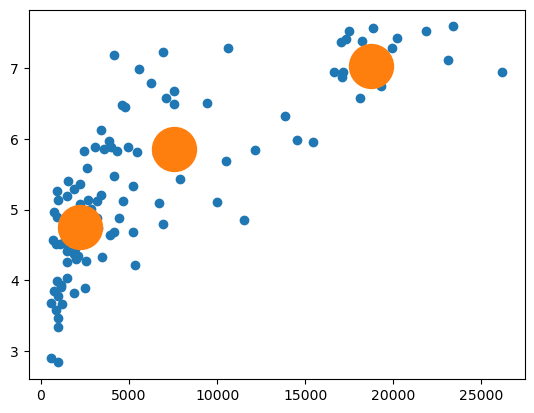

In [16]:
cluster = km_res.cluster_centers_
plt.scatter(income,happy)
plt.scatter(cluster[:,0], cluster[:,1],s=1000)

In [19]:
data.sort_values('income_inequality', inplace = True)

ineq = data[data['income_inequality'] < 40000]

In [18]:
ineq.iloc[0]

country                                    Azerbaijan
adjusted_satisfaction                            46.0
avg_satisfaction                                  5.8
std_satisfaction                                 2.27
avg_income                                     3381.6
median_income                                 2931.48
income_inequality                              24.215
region                   'Central and Eastern Europe'
happyScore                                      5.212
GDP                                           1.02389
country.1                                  Azerbaijan
Name: 5, dtype: object

Text(63.72666666666667, 4.642, 'South Africa')

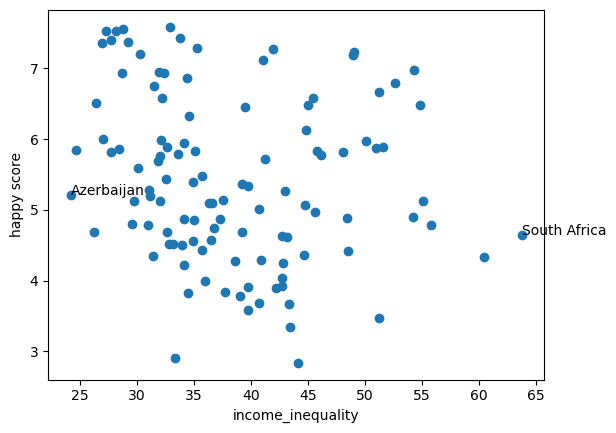

In [79]:
plt.xlabel('income_inequality')
plt.ylabel('happy score')
plt.scatter(ineq['income_inequality'], ineq['happyScore'])
plt.text(ineq.iloc[0]['income_inequality'],
         ineq.iloc[0]['happyScore'],
         ineq.iloc[0]['country'])
plt.text(ineq.iloc[-1]['income_inequality'],
         ineq.iloc[-1]['happyScore'],
         ineq.iloc[-1]['country'])